<a href="https://colab.research.google.com/github/PONGPOLAR/roll20-api-scripts/blob/master/tutorials/Appendix%20-%20Python%20Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appendix: Python Tutorial

This optional tutorial demonstrates the features of the Python language and of Jupyter Notebook that are used in the examples and tutorials of the textbook. Special attention is given to the most important data types used in data analysis workflows, as well as common idioms and patterns employed in these use-cases. This appendix may be especially useful for readers more experienced in programming languages other than Python.

Contents:

1. [Jupyter Notebook](#1.-Jupyter-Notebook)
2. [Conditionals](#2.-Conditionals)
3. [Lists](#3.-Lists)
4. [Loops](#4.-Loops)
5. [Tuples](#5.-Tuples)
6. [Dictionaries](#6.-Dictionaries)
7. [Combining Data Types](#7.-Combining-Data-Types)

# 1. Jupyter Notebook

Even if you're well-versed in Python, you may not have used Jupyter Notebook before. The main idea is that we can mix text and code, and that code is executed in "cells." By clicking on a cell and pressing Shift + Enter, you execute the cell and move to the next cell. Ctrl + Enter executes the cell but does not move to the next cell. You can run many cells at once by using the different options in the "Cell" menu.

Try executing the code in the next cell and observe that the output is printed below the cell.

In [ ]:
print('Hello from Jupyter')

Hello from Jupyter


## 1.1 Printing and inspecting variables

In Jupyter notebooks, we have two different ways of inspecting variables. Python's `print()` function is useful as always:

In [ ]:
my_str = 'Hello'
my_int = 16

print(my_str)
print(my_int)

Hello
16


We can also just execute a cell with the name of a variable:

In [ ]:
my_str

'Hello'

The big difference here between the two approaches is that `print()` statements can output multiple items per cell, while the latter approach will only display the last variable named. Observe:

In [ ]:
my_str
my_int

16

As opposed to the first example using `print()`, this only outputs the last value.

## Nota Bene
One key advantage of presenting information in this notebook format is that it allows you to change and re-run the code cells, then see how the output differs. Don't be afraid to experiment!

# 2. Conditionals

"Conditionals" is a fancy word for if-statements. If you've ever done any programming, you are surely aware of the if-then-else construction. In Python it's done as follows:

In [ ]:
number_of_apples = 5

if number_of_apples < 1:
    print('You have no apples')
elif number_of_apples == 1:
    print('You have one apple')
elif number_of_apples < 4:
    print('You have a few apples')
else:
    print('You have many apples!')

You have many apples!


You can change `number_of_apples` and re-run the previous cell in order to get the different possible outputs.


# 3. Lists

One of Python's most versatile and ubiquitous data types is the List ([Python documentation](https://docs.python.org/3/library/stdtypes.html#list)). This is an **ordered**, **mutable**, **collection** of **non-unique** items.

## 3.1 Ordered

By *ordered*, we mean that the items are addressed by their *index* in the collection:

In [ ]:
student_names = ['Alice', 'Bob', 'Carol', 'Dave']
student_names[1]

'Bob'

Indices in Python start at zero, so the head of the list has index 0:

In [ ]:
student_names[0]

'Alice'

We can get the last item in a list by using negative indexing:

In [ ]:
student_names[-1]

'Dave'

Lists can also be *sliced* to get a subset of the list items:

In [ ]:
student_names[0:2]

['Alice', 'Bob']

In [ ]:
student_names[1:3]

['Bob', 'Carol']

When slicing from the beginning of the list, or to the end of the list, we can leave out the index:

In [ ]:
student_names[:2]

['Alice', 'Bob']

In [ ]:
student_names[2:]

['Carol', 'Dave']

## 3.2 Mutable

By *mutable*, we mean that the list can be changed by adding or removing items. We most often add items to the end of the list with `.append()`:

In [ ]:
student_names.append('Esther')
student_names

['Alice', 'Bob', 'Carol', 'Dave', 'Esther']

But we can also add items at any arbitrary index with `.insert()`:

In [ ]:
student_names.insert(2, 'Xavier')
student_names

['Alice', 'Bob', 'Xavier', 'Carol', 'Dave', 'Esther']

We can delete items with the `del` keyword:

In [ ]:
del student_names[2]
student_names

['Alice', 'Bob', 'Carol', 'Dave', 'Esther']

## 3.3 Non-unique

Note that nothing stops us from repeatedly adding the same name to this list:

In [ ]:
student_names.append('Esther')
student_names.append('Esther')
student_names

['Alice', 'Bob', 'Carol', 'Dave', 'Esther', 'Esther', 'Esther']

If you want a collection where uniqueness is enforced, you should look towards
[sets](https://docs.python.org/3/library/stdtypes.html#set)
or
[dictionaries](https://docs.python.org/3/library/stdtypes.html#dict).

## 3.4 Collection

A collection refers to a data type consisting of more than one values. Lists are one type of collection, but there are others such as tuples, sets, and dictionaries.

When naming your variables that contain lists, you should use plural nouns, *e.g.* `student_names` in the previous example. In contrast, single values should be named with singular nouns, *e.g.* `my_str` in the first section. This helps you and others reading your code keep straight which variables are collections and which are single items, and also helps when writing loops as shown in the next section.

# 4. Loops

If you're coming from another programming language, you're probably aware of more than one type of loop. In Python, we focus on one type of loop in particular: the for-loop. The for-loop iterates through a collection of items, executing its code for each item:

In [ ]:
student_names = ['Alice', 'Bob', 'Carol', 'Dave']

for student_name in student_names:
    print('Hello ' + student_name + '!')

Hello Alice!
Hello Bob!
Hello Carol!
Hello Dave!


## 4.1 Naming conventions

Note the naming convention being used in the for-in construction:

    for student_name in student_names:
    
By using a plural noun for the collection `student_names`, we automatically have good name for the individual items in the collection: `student_name`. The tutorials in this book use this naming convention when possible as it makes clear to the reader which variable is the "loop variable" that changes value between iterations of the loop body.

## 4.2 Loops, lists, and conditionals

One extremely common type of task when working with data is the *filtering task*. In abstract, this task involves looping over one collection, checking each item for some criterion, then adding items that meet the criterion to another collection.

In the following example, we'll create a list of just the "long" names from the `student_names` list. Long names are those that contain more than four characters. You will often see and write code that looks like the following in this book's tutorials:

In [ ]:
# Initialize an empty list and add to it the
# student names containing more than four characters
long_names = []
for student_name in student_names:
    # This is our criterion
    if len(student_name) > 4:
        long_names.append(student_name)

long_names

['Alice', 'Carol']

## 4.3 Nested loops

Loops can be "nested" inside one another. This often occurs when we want to match up items from one collection to items from the same or another collection. Here let's create a list of all possible pairs of students:

In [ ]:
student_names = ['Alice', 'Bob', 'Carol', 'Dave']

student_pairs = []
for student_name_0 in student_names:
    for student_name_1 in student_names:
        student_pairs.append(
            (student_name_0, student_name_1)
        )

student_pairs

[('Alice', 'Alice'),
 ('Alice', 'Bob'),
 ('Alice', 'Carol'),
 ('Alice', 'Dave'),
 ('Bob', 'Alice'),
 ('Bob', 'Bob'),
 ('Bob', 'Carol'),
 ('Bob', 'Dave'),
 ('Carol', 'Alice'),
 ('Carol', 'Bob'),
 ('Carol', 'Carol'),
 ('Carol', 'Dave'),
 ('Dave', 'Alice'),
 ('Dave', 'Bob'),
 ('Dave', 'Carol'),
 ('Dave', 'Dave')]

Note here that instead of just adding names to the `student_pairs` list, we are adding *tuples* `(student_name, language)`. This means each item in the list is a 2-tuple:

In [ ]:
student_pairs[0]

('Alice', 'Alice')

We'll talk more about tuples in the next section. The second thing to notice is that we're including pairs with two of the same student. Suppose we wish to exclude those. We can accomplish this by adding an if-statement in the second for-loop to *filter* out those repeats:

In [ ]:
student_names = ['Alice', 'Bob', 'Carol', 'Dave']

student_pairs = []
for student_name_0 in student_names:
    for student_name_1 in student_names:
        # This is the criterion we added
        if student_name_0 != student_name_1:
            student_pairs.append(
                (student_name_0, student_name_1)
            )

student_pairs

[('Alice', 'Bob'),
 ('Alice', 'Carol'),
 ('Alice', 'Dave'),
 ('Bob', 'Alice'),
 ('Bob', 'Carol'),
 ('Bob', 'Dave'),
 ('Carol', 'Alice'),
 ('Carol', 'Bob'),
 ('Carol', 'Dave'),
 ('Dave', 'Alice'),
 ('Dave', 'Bob'),
 ('Dave', 'Carol')]

And now the list has no repeats.

# 5. Tuples

Even experienced Python users often are confused about the difference between tuples and lists, so definitely read this short section even if you have some experience.

Tuples ([documentation](https://docs.python.org/3/library/stdtypes.html#tuple)) are superficially similar to lists as they are an ordered collection of non-unique items:

In [ ]:
student_grade = ('Alice', 'Spanish', 'A-')
student_grade

('Alice', 'Spanish', 'A-')

In [ ]:
student_grade[0]

'Alice'

## 5.1 Immutable

The big difference from lists is that tuples are **immutable**. Each of the following cells should raise an exception.

In [ ]:
student_grade.append('IU Bloomington')

AttributeError: 'tuple' object has no attribute 'append'

In [ ]:
del student_grade[2]

TypeError: 'tuple' object doesn't support item deletion

In [ ]:
student_grade[2] = 'C'

TypeError: 'tuple' object does not support item assignment

This immutability makes tuples useful when **index matters**. In this example, the index matters semantically: index 0 is the student's name, index 1 is the course name, and index 2 is their grade in the course. The inability to insert or append items to the tuple means that we are certain that, say, the course name won't move around to a different index.

## 5.2 Unpacking

Tuples' immutability makes them useful for *unpacking*. At its simplest, tuple unpacking allows the following:

In [ ]:
student_grade = ('Alice', 'Spanish', 'A-')
student_name, subject, grade = student_grade

print(student_name)
print(subject)
print(grade)

Alice
Spanish
A-


While occasionally useful on its own, tuple unpacking is most useful when used with loops. Consider the following piece of code, which congratulates students on getting good grades:

In [ ]:
student_grades = [
    ('Alice', 'Spanish', 'A'),
    ('Bob', 'French', 'C'),
    ('Carol', 'Italian', 'B+'),
    ('Dave', 'Italian', 'A-'),
]

for student_name, subject, grade in student_grades:
    if grade.startswith('A'):
        print('Congratulations', student_name,
              'on getting an', grade,
              'in', subject)

Congratulations Alice on getting an A in Spanish
Congratulations Dave on getting an A- in Italian


Compare this to the same code using indices:

In [ ]:
for student_grade in student_grades:
    if student_grade[2].startswith('A'):
        print('Congratulations', student_grade[0],
              'on getting an', student_grade[2],
              'in', student_grade[1])

Congratulations Alice on getting an A in Spanish
Congratulations Dave on getting an A- in Italian


Tuple unpacking allows us to easily refer to this structured data by semantic names instead of having to keep the indices straight. The second example, while functionally identical, is more difficult to write and harder still to read.

# 6. Dictionaries

The next type of collection is much different than the previous two, but is among the most powerful tools in Python: the dictionary ([documentation](https://docs.python.org/3/library/stdtypes.html#dict)). The dictionary is an **unordered**, **mutable**, collection of **unique** items. In other languages these are called maps, mappings, hashmaps, hashes, or associative arrays.

## 6.1 Unordered

By unordered, we mean that dictionary items aren't referred to by their position, or index, in the collection. Instead, dictionary items have *keys*, each of which is associated with a value. Here's a very basic example:

In [ ]:
foreign_languages = {
    'Alice': 'Spanish',
    'Bob': 'French',
    'Carol': 'Italian',
    'Dave': 'Italian',
}

Here the student names are the keys and the students' foreign language courses are the values. So to see Carol's foreign language, we use the key -- her name -- instead of an index:

In [ ]:
foreign_languages['Carol']

'Italian'

Trying to get the value for a key that does not exist in the dictionary results in a `KeyError`:

In [ ]:
foreign_languages['Zeke']

KeyError: 'Zeke'

We can check if a particular key is in a dictionary with the `in` keyword:

In [ ]:
'Zeke' in foreign_languages

False

In [ ]:
'Alice' in foreign_languages

True

Note that keys are case-sensitive:

In [ ]:
'alice' in foreign_languages

False

## 6.2 Mutable

We can add, delete, and change entries in a dictionary:

In [ ]:
# Add an entry that doesn't exist
foreign_languages['Esther'] = 'French'
foreign_languages

{'Alice': 'Spanish',
 'Bob': 'French',
 'Carol': 'Italian',
 'Dave': 'Italian',
 'Esther': 'French'}

In [ ]:
# Delete an entry that exists
del foreign_languages['Bob']
foreign_languages

{'Alice': 'Spanish', 'Carol': 'Italian', 'Dave': 'Italian', 'Esther': 'French'}

In [ ]:
# Change an entry that does exist
foreign_languages['Esther'] = 'Italian'
foreign_languages

{'Alice': 'Spanish',
 'Carol': 'Italian',
 'Dave': 'Italian',
 'Esther': 'Italian'}

## 6.3 Unique
Note that the syntax for adding an entry that does not exist and changing an existing entry are the same. When assigning a value to a key in a dictionary, it adds the key if it doesn't exist, or else updates the value for the key if it does exist. As a consequence, keys are necessarily *unique* -- there can't be more than one element with the same key in a dictionary.

## 6.4 Looping over dictionaries

While not performed as often as with lists, it is possible to loop over entries in a dictionary. There are two ways to accomplish this task:

In [ ]:
for key in foreign_languages:
    value = foreign_languages[key]
    print(key, 'is taking', value)

Alice is taking Spanish
Carol is taking Italian
Dave is taking Italian
Esther is taking Italian


In [ ]:
for key, value in foreign_languages.items():
    print(key, 'is taking', value)

Alice is taking Spanish
Carol is taking Italian
Dave is taking Italian
Esther is taking Italian


Here I'm using variables named `key` and `value` to show the general principle. When you write loops over dictionaries in your own code, you should use descriptive names as opposed to `key` and `value`.

## 6.5 Dictionaries as records

In `foreign_languages` we have paired data -- every name is associated with a subject. Dictionaries are also often used to contain several different data about a single entity. To illustrate this subtle difference, let's take a look at one item from `student_grades`:

In [ ]:
student_grade = ('Alice', 'Spanish', 'A')

Here we know that the items in each of these tuples is a name, subject, and grade:

In [ ]:
student_name, subject, grade = student_grades[0]
print(student_name, 'got a grade of', grade, 'in', subject)

Alice got a grade of A in Spanish


We could instead represent this data as a dictionary and use it as such. A dictionary of information describing a single item is often referred to as a *record*:

In [ ]:
record = {
    'name': 'Alice',
    'subject': 'Spanish',
    'grade': 'A',
}
print(record['name'],
      'got a grade of', record['grade'],
      'in', record['subject'])

Alice got a grade of A in Spanish


While the code is slightly longer, there is absolutely no ambiguity here about matching up indices and what each value represents. This is also useful in contexts where some of the fields might be optional.

# 7. Combining Data Types

In most of these simple examples we've worked with collections of simple values like strings and numbers, however data analysis often involves working with complex data, where each item of interest has several data associated with it. These complex data are often represented as collections of collections, *e.g.,* lists of dictionaries.

Choosing the appropriate data types for a given problem will make it easier for you to write bug-free code and will make your code easier for others to read, but identifying the best data types is a skill gained through experience. Some of the commonly-used combination data types are illustrated below, but this is hardly exhaustive.

## 7.1 List of tuples

We've actually seen this one before. Consider the `student_grades` data from the earlier example on tuple unpacking:

In [ ]:
student_grades = [
    ('Alice', 'Spanish', 'A'),
    ('Bob', 'French', 'C'),
    ('Carol', 'Italian', 'B+'),
    ('Dave', 'Italian', 'A-'),
]

This is a list of tuples:

In [ ]:
student_grades[1]

('Bob', 'French', 'C')

and we can work with the individual tuples as such:

In [ ]:
student_grades[1][2]

'C'

## 7.2 List of dictionaries

In the section on dictionaries, we explored how dictionaries are often used to contain several data about a single entity, and each such dictionary is sometimes called a *record*. Let's convert the list of tuples `student_grades` into a list of records `student_grade_records`:

In [ ]:
student_grade_records = []
for student_name, subject, grade in student_grades:
    record = {
        'name': student_name,
        'subject': subject,
        'grade': grade,
    }
    student_grade_records.append(record)

student_grade_records

[{'name': 'Alice', 'subject': 'Spanish', 'grade': 'A'},
 {'name': 'Bob', 'subject': 'French', 'grade': 'C'},
 {'name': 'Carol', 'subject': 'Italian', 'grade': 'B+'},
 {'name': 'Dave', 'subject': 'Italian', 'grade': 'A-'}]

Now each item in the list is a dictionary:

In [ ]:
student_grade_records[1]

{'name': 'Bob', 'subject': 'French', 'grade': 'C'}

and we can work with the individual records as such:

In [ ]:
student_grade_records[1]['grade']

'C'

In [ ]:
import matplotlib.pyplot as plt

In [118]:
import networkx as nx


In [121]:
G = nx.Graph()

In [122]:
G.add_node(1)
G.add_node(2)

In [123]:
G.add_edge(1,2)

In [124]:
G.add_nodes_from([3,4,5])
G.add_edges_from([(3,4),(3,5)])

In [ ]:
G.nodes()
G.edges()

In [ ]:
list(G.neighbors(1))

In [125]:
for n in G.nodes:
  print(n, list(G.neighbors(n)))

1 [2]
2 [1]
3 [4, 5]
4 [3]
5 [3]


In [126]:
for u,v in G.edges:
  print(u,v)

1 2
3 4
3 5


In [127]:
D = nx.DiGraph()

In [129]:
D.add_edge(1,2)
D.add_edge(2,1)

In [130]:
D.add_edges_from([(2,3),(3,4),(4,3)])

In [131]:
D.number_of_nodes()

4

In [132]:
D. number_of_edges()

5

In [133]:
list(D.neighbors(1))

[2]

In [134]:
list(D.predecessors(1))

[2]

In [135]:
list(D.successors(1))

[2]

In [138]:
B=nx.complete_bipartite_graph(4,5)

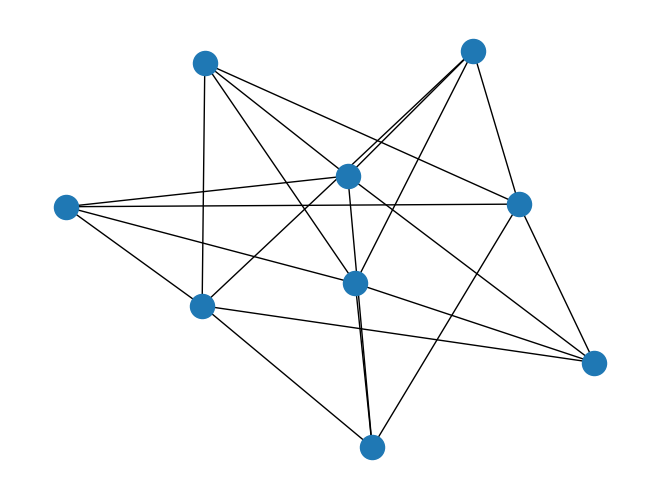

In [39]:
C=nx.cycle_grap(4))

In [43]:
S = nx.star_graph(6)

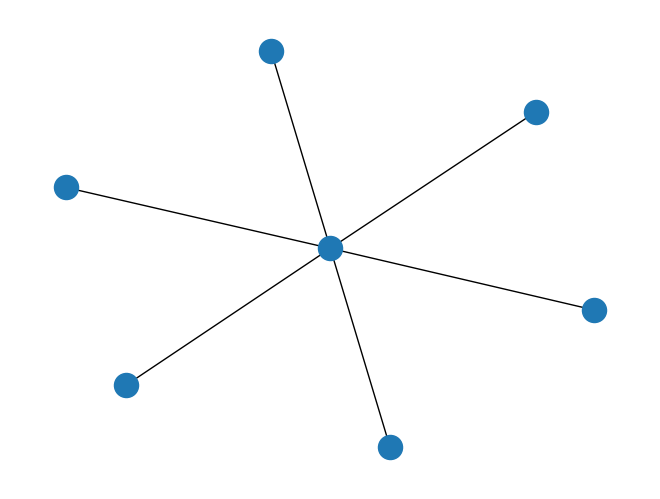

In [140]:
nx.draw(S)
plt.show(S)

In [47]:
P=nx.path_graph(5)

In [48]:
nx.density(G)

0.3

In [49]:
nx.density(D)

0.3333333333333333

In [142]:
CG=nx.complete_graph(8471)

In [52]:
nx.density(CG)

1.0

In [143]:
K5=nx.complete_graph(5)
clique = nx.subgraph(K5,(0,1,2))

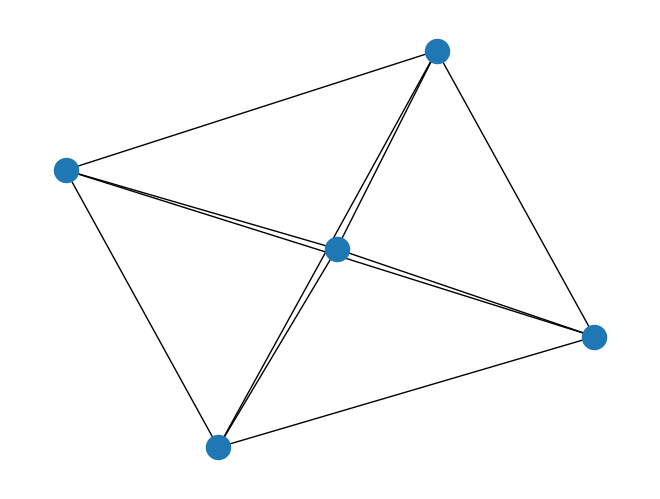

In [144]:
nx.draw(K5)

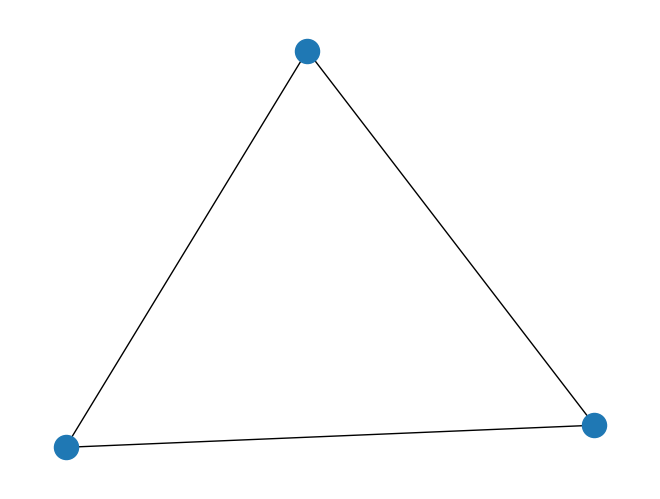

In [145]:
nx.draw(clique)

In [146]:
G.degree(2)

1

In [147]:
G.degree()

DegreeView({1: 1, 2: 1, 3: 2, 4: 1, 5: 1})

In [69]:
D.in_degree(2)

3

In [148]:
D.out_degree(2)

2

In [149]:
D.degree(2)

3

In [150]:
W=nx.Graph()

In [151]:
W.add_edge(1,2,weight=6)

In [152]:
W.add_weighted_edges_from([(2,3,3),(2,4,5)])

In [154]:
for (i,j,w) in W.edges(data='weight'):
  if w>3:
    print('(%d,%d,%d)'% (i,j,w))

(1,2,6)
(2,4,5)


In [80]:
W.degree(2,weight='weight')

14

In [157]:
print(nx.adjacency_matrix(G))

<Compressed Sparse Row sparse array of dtype 'int64'
	with 6 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	1
  (1, 0)	1
  (2, 3)	1
  (2, 4)	1
  (3, 2)	1
  (4, 2)	1


In [156]:
G.edges[3,4]['color']='blue'

In [90]:
print(nx.adjacency_matrix(D))

<Compressed Sparse Row sparse array of dtype 'int64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 3)	1


In [94]:
D.edges[3,4]
D.edges[4,3]

{}

In [95]:
print(nx.adjacency_matrix(W))

<Compressed Sparse Row sparse array of dtype 'int64'
	with 6 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	6
  (1, 0)	6
  (1, 2)	3
  (1, 3)	5
  (2, 1)	3
  (3, 1)	5


In [160]:
W.edges[2,3]
W.edges[2,3]['weight']=2

In [100]:
for n, neighbors in G.adjacency():
  for number, link_attributes in neighbors.items():
    print('(%d,%d)'%(n,number))

(1,2)
(2,1)
(3,4)
(3,5)
(4,3)
(5,3)


In [101]:
nx.write_edgelist(G,"file.edges")

In [102]:
G2=nx.read_edgelist("file.edges")

In [103]:
nx.write_weighted_edgelist(W, "wf.edges")

In [104]:
with open("wf.edges")as f:
  for line in f:
    print(line)

1 2 6

2 3 2

2 4 5



In [105]:
W2 = nx.read_weighted_edgelist("wf.edges")

In [106]:
import matplotlib.pyplot as plt

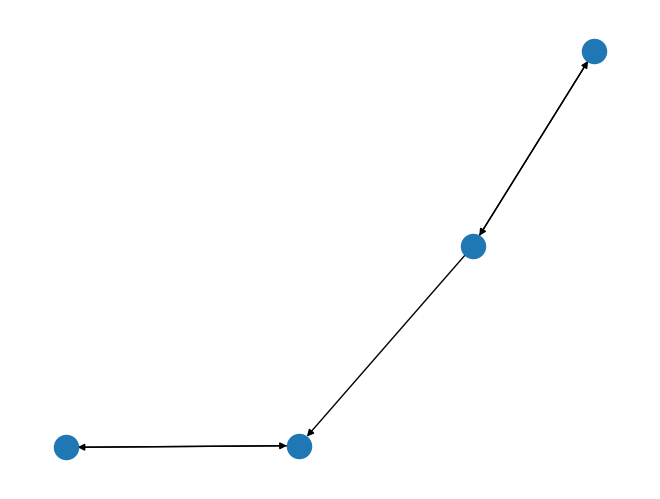

In [166]:
nx.draw (D)

In [111]:
plt.show()